In [13]:
import pandas as pd
import os
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from sys import exit as sys_exit

In [14]:
csv_path = '/Users/stamatisfrangoulis/MATH596/Project/SmallTrainData.csv'

    
df = pd.read_csv(csv_path)
print("Columns in df:\n", df.columns)

target_col = "#co2"
    
numeric_df = df.select_dtypes(include=["int64", "float64"]).copy()
numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_df = numeric_df.dropna()




X = numeric_df.drop(columns=[target_col]).values
y = numeric_df[target_col].values

Columns in df:
 Index(['#co2', ' lat', ' lon', ' sst', ' sst-ave', ' sss', ' mld', ' chl',
       ' year', ' month'],
      dtype='object')


In [15]:
X = numeric_df.drop(columns=[target_col]).values
y = numeric_df[target_col].values

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

X_mean = X_tensor.mean(dim=0, keepdim=True)
X_std  = X_tensor.std(dim=0, keepdim=True) + 1e-8
X_norm = (X_tensor - X_mean) / X_std

y_mean = y_tensor.mean()
y_std  = y_tensor.std() + 1e-8
y_norm = (y_tensor - y_mean) / y_std


train_dataset = TensorDataset(X_norm, y_norm)
train_dl = DataLoader(train_dataset, batch_size=64, shuffle=True)


In [16]:
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_sizes=[128, 64, 32], output_size=1, dropout_p=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.net(x)



In [17]:
# class FFNN(nn.Module):
#     def __init__(self, input_size, hidden_sizes=[128, 64, 32], dropout_p=0.2):
#         super().__init__()
#         layers = []
#         in_dim = input_size

#         for h in hidden_sizes:
#             layers.append(nn.Linear(in_dim, h))
#             layers.append(nn.BatchNorm1d(h))
#             layers.append(nn.ReLU())
#             layers.append(nn.Dropout(dropout_p))
#             in_dim = h

#         layers.append(nn.Linear(in_dim, 1))  # output
#         self.net = nn.Sequential(*layers)

#     def forward(self, x):
#         return self.net(x)


In [18]:
input_size=X_tensor.shape[1]
hidden_size=36
output_size=1

model = FFNN(input_size, hidden_sizes=[128, 64, 32])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [19]:


num_epochs = 2000
torch.manual_seed(1)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for features, targets in train_dl:
        outputs = model(features)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * features.size(0)

    epoch_loss = running_loss / len(train_dl.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.10f}")


Epoch [1/2000], Loss: 0.4573739807
Epoch [2/2000], Loss: 0.3492649198
Epoch [3/2000], Loss: 0.3245269774
Epoch [4/2000], Loss: 0.3116296329
Epoch [5/2000], Loss: 0.3036294816
Epoch [6/2000], Loss: 0.2988023493
Epoch [7/2000], Loss: 0.2936454459
Epoch [8/2000], Loss: 0.2902269298
Epoch [9/2000], Loss: 0.2880477465
Epoch [10/2000], Loss: 0.2852881098
Epoch [11/2000], Loss: 0.2827324760
Epoch [12/2000], Loss: 0.2797055949
Epoch [13/2000], Loss: 0.2779471494
Epoch [14/2000], Loss: 0.2759026846
Epoch [15/2000], Loss: 0.2739816705
Epoch [16/2000], Loss: 0.2729210066
Epoch [17/2000], Loss: 0.2712837519
Epoch [18/2000], Loss: 0.2702452823
Epoch [19/2000], Loss: 0.2688576881
Epoch [20/2000], Loss: 0.2686825329
Epoch [21/2000], Loss: 0.2671566787
Epoch [22/2000], Loss: 0.2667926401
Epoch [23/2000], Loss: 0.2655843485
Epoch [24/2000], Loss: 0.2648742882
Epoch [25/2000], Loss: 0.2638597231
Epoch [26/2000], Loss: 0.2640303477
Epoch [27/2000], Loss: 0.2629003783
Epoch [28/2000], Loss: 0.2618699661
E

Epoch [226/2000], Loss: 0.2288093738
Epoch [227/2000], Loss: 0.2289733797
Epoch [228/2000], Loss: 0.2282771423
Epoch [229/2000], Loss: 0.2286015640
Epoch [230/2000], Loss: 0.2285513716
Epoch [231/2000], Loss: 0.2284980580
Epoch [232/2000], Loss: 0.2282358417
Epoch [233/2000], Loss: 0.2289368096
Epoch [234/2000], Loss: 0.2284090108
Epoch [235/2000], Loss: 0.2283004545
Epoch [236/2000], Loss: 0.2281305193
Epoch [237/2000], Loss: 0.2281336542
Epoch [238/2000], Loss: 0.2282698212
Epoch [239/2000], Loss: 0.2282833549
Epoch [240/2000], Loss: 0.2281307896
Epoch [241/2000], Loss: 0.2280726050
Epoch [242/2000], Loss: 0.2281672952
Epoch [243/2000], Loss: 0.2278458983
Epoch [244/2000], Loss: 0.2283703070
Epoch [245/2000], Loss: 0.2281463531
Epoch [246/2000], Loss: 0.2282917839
Epoch [247/2000], Loss: 0.2278539569
Epoch [248/2000], Loss: 0.2282050643
Epoch [249/2000], Loss: 0.2279295909
Epoch [250/2000], Loss: 0.2272551066
Epoch [251/2000], Loss: 0.2274515847
Epoch [252/2000], Loss: 0.2273761141
E

Epoch [448/2000], Loss: 0.2208608524
Epoch [449/2000], Loss: 0.2214259606
Epoch [450/2000], Loss: 0.2207374350
Epoch [451/2000], Loss: 0.2214395329
Epoch [452/2000], Loss: 0.2213070933
Epoch [453/2000], Loss: 0.2208949935
Epoch [454/2000], Loss: 0.2207659040
Epoch [455/2000], Loss: 0.2215567595
Epoch [456/2000], Loss: 0.2212349422
Epoch [457/2000], Loss: 0.2206644786
Epoch [458/2000], Loss: 0.2215204207
Epoch [459/2000], Loss: 0.2210018800
Epoch [460/2000], Loss: 0.2214261403
Epoch [461/2000], Loss: 0.2209817140
Epoch [462/2000], Loss: 0.2208566446
Epoch [463/2000], Loss: 0.2208027357
Epoch [464/2000], Loss: 0.2213168834
Epoch [465/2000], Loss: 0.2209920249
Epoch [466/2000], Loss: 0.2211819081
Epoch [467/2000], Loss: 0.2210186754
Epoch [468/2000], Loss: 0.2208400082
Epoch [469/2000], Loss: 0.2211130898
Epoch [470/2000], Loss: 0.2214799942
Epoch [471/2000], Loss: 0.2205851127
Epoch [472/2000], Loss: 0.2205842982
Epoch [473/2000], Loss: 0.2210385439
Epoch [474/2000], Loss: 0.2206815359
E

Epoch [670/2000], Loss: 0.2179309190
Epoch [671/2000], Loss: 0.2179283313
Epoch [672/2000], Loss: 0.2179757701
Epoch [673/2000], Loss: 0.2182403403
Epoch [674/2000], Loss: 0.2176036012
Epoch [675/2000], Loss: 0.2184449277
Epoch [676/2000], Loss: 0.2178899473
Epoch [677/2000], Loss: 0.2179703453
Epoch [678/2000], Loss: 0.2176804807
Epoch [679/2000], Loss: 0.2176766961
Epoch [680/2000], Loss: 0.2173647278
Epoch [681/2000], Loss: 0.2178421638
Epoch [682/2000], Loss: 0.2177737639
Epoch [683/2000], Loss: 0.2184553505
Epoch [684/2000], Loss: 0.2181599893
Epoch [685/2000], Loss: 0.2179132068
Epoch [686/2000], Loss: 0.2174602931
Epoch [687/2000], Loss: 0.2179905284
Epoch [688/2000], Loss: 0.2179422038
Epoch [689/2000], Loss: 0.2177623396
Epoch [690/2000], Loss: 0.2179084419
Epoch [691/2000], Loss: 0.2177251370
Epoch [692/2000], Loss: 0.2171999859
Epoch [693/2000], Loss: 0.2174066410
Epoch [694/2000], Loss: 0.2173347182
Epoch [695/2000], Loss: 0.2178656881
Epoch [696/2000], Loss: 0.2177200815
E

Epoch [892/2000], Loss: 0.2153291133
Epoch [893/2000], Loss: 0.2151312755
Epoch [894/2000], Loss: 0.2147449327
Epoch [895/2000], Loss: 0.2152647418
Epoch [896/2000], Loss: 0.2150638225
Epoch [897/2000], Loss: 0.2153917670
Epoch [898/2000], Loss: 0.2153632769
Epoch [899/2000], Loss: 0.2151657462
Epoch [900/2000], Loss: 0.2156233523
Epoch [901/2000], Loss: 0.2154423971
Epoch [902/2000], Loss: 0.2146707175
Epoch [903/2000], Loss: 0.2156747780
Epoch [904/2000], Loss: 0.2153223600
Epoch [905/2000], Loss: 0.2151461114
Epoch [906/2000], Loss: 0.2156750553
Epoch [907/2000], Loss: 0.2151019948
Epoch [908/2000], Loss: 0.2151945786
Epoch [909/2000], Loss: 0.2156427783
Epoch [910/2000], Loss: 0.2149056318
Epoch [911/2000], Loss: 0.2152161180
Epoch [912/2000], Loss: 0.2152692918
Epoch [913/2000], Loss: 0.2153631266
Epoch [914/2000], Loss: 0.2154398489
Epoch [915/2000], Loss: 0.2154628927
Epoch [916/2000], Loss: 0.2155343516
Epoch [917/2000], Loss: 0.2148959510
Epoch [918/2000], Loss: 0.2146602516
E

Epoch [1111/2000], Loss: 0.2140342265
Epoch [1112/2000], Loss: 0.2138356212
Epoch [1113/2000], Loss: 0.2138624075
Epoch [1114/2000], Loss: 0.2133998267
Epoch [1115/2000], Loss: 0.2136048590
Epoch [1116/2000], Loss: 0.2140087857
Epoch [1117/2000], Loss: 0.2135308766
Epoch [1118/2000], Loss: 0.2137294955
Epoch [1119/2000], Loss: 0.2137882664
Epoch [1120/2000], Loss: 0.2140883077
Epoch [1121/2000], Loss: 0.2136791685
Epoch [1122/2000], Loss: 0.2135840773
Epoch [1123/2000], Loss: 0.2136129148
Epoch [1124/2000], Loss: 0.2140475566
Epoch [1125/2000], Loss: 0.2135025639
Epoch [1126/2000], Loss: 0.2138081757
Epoch [1127/2000], Loss: 0.2136733553
Epoch [1128/2000], Loss: 0.2136045933
Epoch [1129/2000], Loss: 0.2135848867
Epoch [1130/2000], Loss: 0.2138317106
Epoch [1131/2000], Loss: 0.2136499615
Epoch [1132/2000], Loss: 0.2136482555
Epoch [1133/2000], Loss: 0.2135401504
Epoch [1134/2000], Loss: 0.2132938167
Epoch [1135/2000], Loss: 0.2138922173
Epoch [1136/2000], Loss: 0.2138656635
Epoch [1137/

Epoch [1327/2000], Loss: 0.2125649932
Epoch [1328/2000], Loss: 0.2118471915
Epoch [1329/2000], Loss: 0.2125792078
Epoch [1330/2000], Loss: 0.2127335515
Epoch [1331/2000], Loss: 0.2127557995
Epoch [1332/2000], Loss: 0.2128815827
Epoch [1333/2000], Loss: 0.2124455985
Epoch [1334/2000], Loss: 0.2123493525
Epoch [1335/2000], Loss: 0.2124129158
Epoch [1336/2000], Loss: 0.2125999976
Epoch [1337/2000], Loss: 0.2123326582
Epoch [1338/2000], Loss: 0.2131395426
Epoch [1339/2000], Loss: 0.2124767660
Epoch [1340/2000], Loss: 0.2125444113
Epoch [1341/2000], Loss: 0.2125943436
Epoch [1342/2000], Loss: 0.2125022874
Epoch [1343/2000], Loss: 0.2123714813
Epoch [1344/2000], Loss: 0.2126442878
Epoch [1345/2000], Loss: 0.2126015822
Epoch [1346/2000], Loss: 0.2123324411
Epoch [1347/2000], Loss: 0.2129858758
Epoch [1348/2000], Loss: 0.2124399443
Epoch [1349/2000], Loss: 0.2124640635
Epoch [1350/2000], Loss: 0.2124298310
Epoch [1351/2000], Loss: 0.2122815143
Epoch [1352/2000], Loss: 0.2120940587
Epoch [1353/

Epoch [1543/2000], Loss: 0.2117457590
Epoch [1544/2000], Loss: 0.2117824357
Epoch [1545/2000], Loss: 0.2117125482
Epoch [1546/2000], Loss: 0.2115836492
Epoch [1547/2000], Loss: 0.2118084170
Epoch [1548/2000], Loss: 0.2118036792
Epoch [1549/2000], Loss: 0.2117695794
Epoch [1550/2000], Loss: 0.2116855755
Epoch [1551/2000], Loss: 0.2117911094
Epoch [1552/2000], Loss: 0.2122856195
Epoch [1553/2000], Loss: 0.2119185907
Epoch [1554/2000], Loss: 0.2113500906
Epoch [1555/2000], Loss: 0.2117451142
Epoch [1556/2000], Loss: 0.2119029679
Epoch [1557/2000], Loss: 0.2115410631
Epoch [1558/2000], Loss: 0.2114894329
Epoch [1559/2000], Loss: 0.2113477239
Epoch [1560/2000], Loss: 0.2122104493
Epoch [1561/2000], Loss: 0.2116925647
Epoch [1562/2000], Loss: 0.2115678198
Epoch [1563/2000], Loss: 0.2118245960
Epoch [1564/2000], Loss: 0.2117022944
Epoch [1565/2000], Loss: 0.2115095470
Epoch [1566/2000], Loss: 0.2118023817
Epoch [1567/2000], Loss: 0.2114373877
Epoch [1568/2000], Loss: 0.2118008403
Epoch [1569/

Epoch [1759/2000], Loss: 0.2112374787
Epoch [1760/2000], Loss: 0.2108960135
Epoch [1761/2000], Loss: 0.2107843151
Epoch [1762/2000], Loss: 0.2112272419
Epoch [1763/2000], Loss: 0.2110901847
Epoch [1764/2000], Loss: 0.2113006185
Epoch [1765/2000], Loss: 0.2112208603
Epoch [1766/2000], Loss: 0.2109574132
Epoch [1767/2000], Loss: 0.2110035501
Epoch [1768/2000], Loss: 0.2106469038
Epoch [1769/2000], Loss: 0.2111532105
Epoch [1770/2000], Loss: 0.2109176158
Epoch [1771/2000], Loss: 0.2110019536
Epoch [1772/2000], Loss: 0.2109013097
Epoch [1773/2000], Loss: 0.2107292295
Epoch [1774/2000], Loss: 0.2109728185
Epoch [1775/2000], Loss: 0.2111754178
Epoch [1776/2000], Loss: 0.2109459205
Epoch [1777/2000], Loss: 0.2111089408
Epoch [1778/2000], Loss: 0.2107546632
Epoch [1779/2000], Loss: 0.2109924096
Epoch [1780/2000], Loss: 0.2109092133
Epoch [1781/2000], Loss: 0.2110170763
Epoch [1782/2000], Loss: 0.2112178877
Epoch [1783/2000], Loss: 0.2110587417
Epoch [1784/2000], Loss: 0.2112137189
Epoch [1785/

Epoch [1975/2000], Loss: 0.2108911843
Epoch [1976/2000], Loss: 0.2100411874
Epoch [1977/2000], Loss: 0.2105700888
Epoch [1978/2000], Loss: 0.2103854907
Epoch [1979/2000], Loss: 0.2102102519
Epoch [1980/2000], Loss: 0.2100037146
Epoch [1981/2000], Loss: 0.2103486294
Epoch [1982/2000], Loss: 0.2104041903
Epoch [1983/2000], Loss: 0.2099466016
Epoch [1984/2000], Loss: 0.2100255159
Epoch [1985/2000], Loss: 0.2099686672
Epoch [1986/2000], Loss: 0.2098799943
Epoch [1987/2000], Loss: 0.2096054551
Epoch [1988/2000], Loss: 0.2101934435
Epoch [1989/2000], Loss: 0.2101208025
Epoch [1990/2000], Loss: 0.2101679174
Epoch [1991/2000], Loss: 0.2105624682
Epoch [1992/2000], Loss: 0.2100914810
Epoch [1993/2000], Loss: 0.2102009533
Epoch [1994/2000], Loss: 0.2100018993
Epoch [1995/2000], Loss: 0.2100245101
Epoch [1996/2000], Loss: 0.2103234174
Epoch [1997/2000], Loss: 0.2098294063
Epoch [1998/2000], Loss: 0.2103364245
Epoch [1999/2000], Loss: 0.2105056109
Epoch [2000/2000], Loss: 0.2101822557


In [108]:
csv_path = '/Users/stamatisfrangoulis/MATH596/Project/SmallTestData.csv'

    
df = pd.read_csv(csv_path)
print(df.columns)

month_to_select =2  # choose month 1–12

target_col = "#co2"

feature_cols = [' lat', ' lon', ' sst', ' sst-ave', ' sss', ' mld', ' chl', ' year', ' month']
month_col   = ' month'
lon_col     = ' lon'
lat_col     = ' lat'

df_month = df[df[' month'] == month_to_select].copy()

# This is the observed data we’ll plot in the top panel
df_subset = df_month[[' lon', ' lat', '#co2']].dropna()

print(f"Observed samples for month {month_to_select}: {len(df_subset)}")

# -------------------------------------------------
# 2. Build EVAL subset (features for the model)
# -------------------------------------------------
df_eval = df_month.dropna(subset=feature_cols).copy()

print(f"Evaluation samples for month {month_to_select}: {len(df_eval)}")

# Safety check
if len(df_subset) == 0 or len(df_eval) == 0:
    raise ValueError("No data available for this month after filtering!")
    

    


Index(['#co2', ' lat', ' lon', ' sst', ' sst-ave', ' sss', ' mld', ' chl',
       ' year', ' month'],
      dtype='object')
Observed samples for month 2: 105
Evaluation samples for month 2: 105


In [127]:
# ---------------------------
# 1. Select the month to evaluate
# ---------------------------
df_eval = df[df[month_col] == month_to_select].copy()

# Remove rows missing features
df_eval = df_eval.dropna(subset=feature_cols)

print(f"Evaluating model on {len(df_eval)} samples for month {month_to_select}")

# ---------------------------
# 2. Extract evaluation features
# ---------------------------
X_eval = df_eval[feature_cols].values.astype(np.float32)

# ---------------------------
# 3. Normalize using TRAINING statistics
# ---------------------------
X_mean_np = X_mean.cpu().numpy()
X_std_np  = X_std.cpu().numpy()

X_eval_norm = (X_eval - X_mean_np) / X_std_np

# Convert to tensor
X_eval_tensor = torch.tensor(X_eval_norm, dtype=torch.float32)

# ---------------------------
# 4. Predict (NO grad)
# ---------------------------
model.eval()
with torch.no_grad():
    y_eval_norm = model(X_eval_tensor).cpu().numpy().squeeze()

# ---------------------------
# 5. Un-normalize predictions
# ---------------------------
y_mean_np = y_mean.cpu().numpy()
y_std_np  = y_std.cpu().numpy()

co2_pred = y_eval_norm * y_std_np + y_mean_np

# Attach predictions to the dataframe
df_eval["co2_pred"] = co2_pred

print(df_eval[[lon_col, lat_col, "co2_pred"]].head())


global_min = min(
    df_subset[target_col].min(),
    df_eval["co2_pred"].min()
)
global_max = max(
    df_subset[target_col].max(),
    df_eval["co2_pred"].max()
)

fixed_vmin = 315
fixed_vmax = 400


Evaluating model on 105 samples for month 2
      lon   lat    co2_pred
110  -4.5 -67.5  315.533508
111  -3.5 -67.5  316.026215
112  -3.5 -66.5  312.482635
113  -2.5 -66.5  311.399780
114  -1.5 -66.5  311.228241


Observed points in zoom area: 12
Predicted points in zoom area: 12


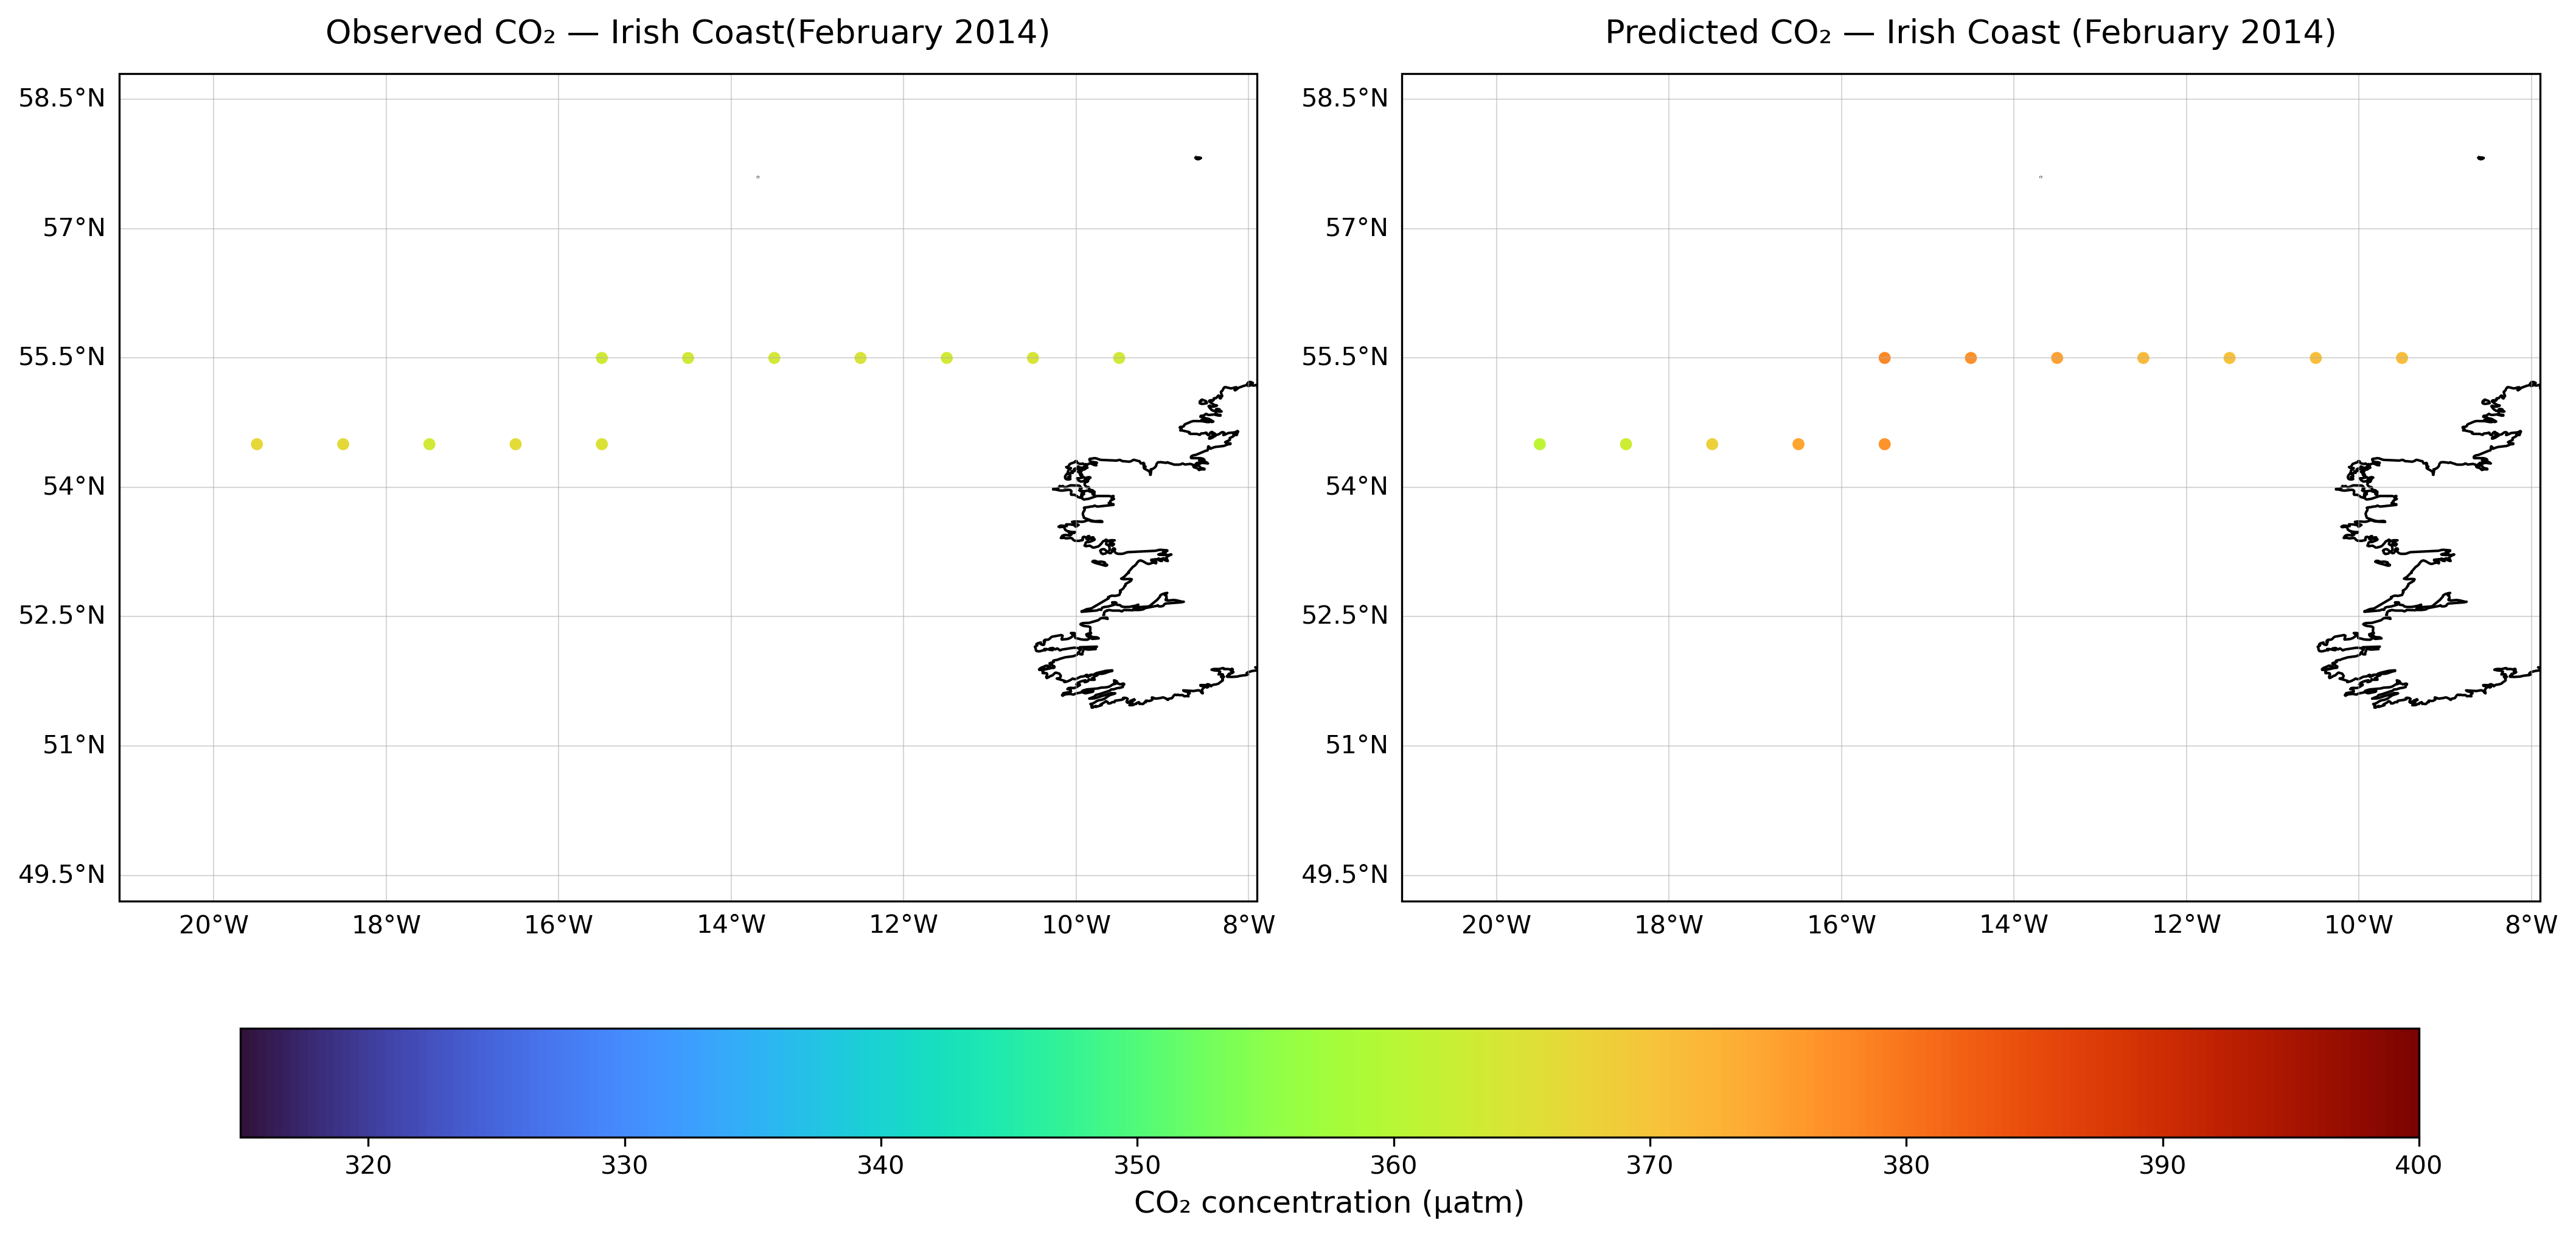


RMSE for zoomed region:
9.148787478066975


In [128]:
# -------------------------------------------------
# ZOOM PLOT: specify area by lon/lat bounds
# -------------------------------------------------

# 1. ENTER YOUR DESIRED ZOOM BOX (EDIT THESE)
min_lon_zoom = -20   # 50°W
max_lon_zoom = -9   # 30°W
min_lat_zoom = 50   # 63°S
max_lat_zoom = 58 

# 2. Filter data to only the zoom region
zoom_obs = df_subset[
    (df_subset[lon_col] >= min_lon_zoom) &
    (df_subset[lon_col] <= max_lon_zoom) &
    (df_subset[lat_col] >= min_lat_zoom) &
    (df_subset[lat_col] <= max_lat_zoom)
].copy()

zoom_pred = df_eval[
    (df_eval[lon_col] >= min_lon_zoom) &
    (df_eval[lon_col] <= max_lon_zoom) &
    (df_eval[lat_col] >= min_lat_zoom) &
    (df_eval[lat_col] <= max_lat_zoom)
].copy()

print(f"Observed points in zoom area: {len(zoom_obs)}")
print(f"Predicted points in zoom area: {len(zoom_pred)}")

if len(zoom_obs) == 0 or len(zoom_pred) == 0:
    raise ValueError("No points found in the specified zoom area!")

# 3. Map extent based on zoomed region (BUT color scale is fixed)
pad_lon = (max_lon_zoom - min_lon_zoom) * 0.1
pad_lat = (max_lat_zoom - min_lat_zoom) * 0.1

extent = [
    min_lon_zoom - pad_lon, max_lon_zoom + pad_lon,
    min_lat_zoom - pad_lat, max_lat_zoom + pad_lat
]

# 4. Plot the zoomed region: top = observed, bottom = predicted
fig, axes = plt.subplots(
    1, 2,
    figsize=(14, 10),
    dpi=300,
    subplot_kw={"projection": ccrs.PlateCarree()},
    constrained_layout=True
)

for ax in axes:
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
    gl.right_labels = False
    gl.top_labels = False

# Observed CO2 in zoom area
sc1 = axes[0].scatter(
    zoom_obs[lon_col], zoom_obs[lat_col],
    c=zoom_obs[target_col],
    cmap="turbo",
    vmin=fixed_vmin, vmax=fixed_vmax,
    s=14,
    transform=ccrs.PlateCarree()
)
axes[0].set_title(f"Observed CO₂ — Irish Coast(February 2014)",
                  fontsize=13, pad=12)

# Predicted CO2 in zoom area
sc2 = axes[1].scatter(
    zoom_pred[lon_col], zoom_pred[lat_col],
    c=zoom_pred["co2_pred"],
    cmap="turbo",
    vmin=fixed_vmin, vmax=fixed_vmax,
    s=14,
    transform=ccrs.PlateCarree()
)
axes[1].set_title(f"Predicted CO₂ — Irish Coast (February 2014)",
                  fontsize=13, pad=12)

# Shared colorbar (now fixed)
cbar = fig.colorbar(sc2, ax=axes,orientation="horizontal", shrink=0.9)
cbar.set_label("CO₂ concentration (µatm)", fontsize=12)

plt.show()


zoom_compare = zoom_obs.merge(
    zoom_pred[[lon_col, lat_col, "co2_pred"]],
    on=[lon_col, lat_col],
    how="inner"
)

# Compute squared error
zoom_compare["squared_error"] = (
    zoom_compare[target_col] - zoom_compare["co2_pred"]
)**2

# RMSE = sqrt(mean squared error)
rmse = np.sqrt(zoom_compare["squared_error"].mean())

print("\nRMSE for zoomed region:")
print(rmse)




In [120]:
# -------------------------------------------------
# TABLE OF ZOOMED POINTS WITH NORMALIZED ERROR
# -------------------------------------------------

# Merge observed + predicted on lon and lat
zoom_compare = zoom_obs.merge(
    zoom_pred[[lon_col, lat_col, "co2_pred"]],
    on=[lon_col, lat_col],
    how="inner"
)

# Compute absolute and normalized errors
zoom_compare["Abs_Error"] = (zoom_compare[target_col] - zoom_compare["co2_pred"]).abs()
zoom_compare["Normalized_Error"] = zoom_compare["Abs_Error"] / zoom_compare[target_col].abs()

# Select clean output columns
zoom_table = zoom_compare[
    [ target_col, "co2_pred", "Normalized_Error"]
].rename(columns={
    target_col: "Actual_CO2",
    "co2_pred": "Predicted_CO2"
})

print("\nZoomed Region Error Table:")
print(zoom_table.to_string(index=False))



Zoomed Region Error Table:
 Actual_CO2  Predicted_CO2  Normalized_Error
    366.831     360.823578          0.016377
    366.649     362.838440          0.010393
    363.646     367.819427          0.011477
    366.176     374.728119          0.023355
    365.000     376.743073          0.032173
    363.327     377.782745          0.039787
    363.280     376.799988          0.037216
    363.512     374.858490          0.031214
    364.532     371.673706          0.019591
    363.760     370.576141          0.018738
    364.328     371.035553          0.018411
    363.477     371.375214          0.021730


In [80]:
# --- Build comparison table (matched by lat/lon for same month) ---

# Merge df_subset (observed) with df_eval (predicted)
comparison_df = df_subset.merge(
    df_eval[[lon_col, lat_col, "co2_pred"]],
    on=[lon_col, lat_col],
    how="inner"
)

# Rename columns for clarity
comparison_df = comparison_df.rename(columns={
    target_col: "Actual_CO2",
    "co2_pred": "Predicted_CO2"
})

print("Comparison Table (Actual vs Predicted CO₂):")
print(comparison_df.head(20))   # show first 20 rows


Comparison Table (Actual vs Predicted CO₂):
     lon   lat  Actual_CO2  Predicted_CO2
0  -30.5 -60.5     360.521     326.791199
1  -48.5 -59.5     344.778     338.894867
2  -47.5 -59.5     342.605     338.093903
3  -46.5 -59.5     322.948     336.967102
4  -45.5 -59.5     317.573     334.045624
5  -44.5 -59.5     317.421     331.994659
6  -43.5 -59.5     328.849     332.375549
7  -42.5 -59.5     310.074     331.097107
8  -41.5 -59.5     305.004     329.352081
9  -40.5 -59.5     310.336     327.373993
10 -39.5 -59.5     313.873     326.964966
11 -38.5 -59.5     315.138     326.816071
12 -37.5 -59.5     305.074     326.660797
13 -36.5 -59.5     311.915     326.423340
14 -35.5 -59.5     329.104     326.203735
15 -34.5 -59.5     318.227     325.848389
16 -33.5 -59.5     344.287     325.558197
17 -32.5 -59.5     356.046     325.585602
18 -31.5 -59.5     361.733     326.867493
19 -30.5 -59.5     343.230     327.496094


In [48]:
# Compute normalized error
comparison_df["Normalized_Error"] = (
    (comparison_df["Predicted_CO2"] - comparison_df["Actual_CO2"]).abs()
    / comparison_df["Actual_CO2"].abs()
)

# Show only requested columns
result = comparison_df[["Actual_CO2", "Predicted_CO2", "Normalized_Error"]]

print(result.head(20))



    Actual_CO2  Predicted_CO2  Normalized_Error
0      304.820     314.284119          0.031048
1      291.174     329.435913          0.131406
2      296.427     322.753143          0.088812
3      294.812     321.877991          0.091808
4      301.615     320.444916          0.062430
5      291.536     317.877594          0.090355
6      317.264     316.167450          0.003456
7      296.144     312.943787          0.056728
8      296.051     314.666046          0.062878
9      295.620     310.388947          0.049959
10     294.724     314.027863          0.065498
11     289.972     314.053741          0.083049
12     298.403     316.519501          0.060712
13     306.378     321.889008          0.050627
14     318.713     331.822144          0.041131
15     321.047     347.345276          0.081914
16     323.076     341.808014          0.057980
17     309.609     342.929626          0.107622
18     306.803     309.575592          0.009037
19     298.533     311.977966          0